<a href="https://colab.research.google.com/github/JoaoAreias/Artificial-intelligence/blob/master/Non_linear_dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Answers to quizzes on the nonlinear dynamics course on https://www.complexityexplorer.org/

### Dependencies:

In [0]:
import matplotlib.pyplot as plt
import numpy as np

### Maps and difference equations

#### Question 1:
Calculate the third iterate of the logistic map with r = 2.5 starting from x0 = 0.5.  What is the third iterate you calculated?  (Choose the one that's closest; different computers and calculators do arithmetic slightly different, so your answer may vary a bit).

In [0]:
def apply_map(func, x0, n, args=()):
  """ Recieves a function "func"
  and apply it to x0 n times.
  
  Additional arguments are passed 
  in args
  """
  x = x0
  for _ in range(n):
    x = func(x, *args)
  return x

In [3]:
logistic_map = lambda x, r: r*x*(1-x)
print(apply_map(logistic_map, x0=0.5, n=3, args=(2.5,)))

0.606536865234375


#### Question 2:
Write a simple program that uses a loop to compute a specified number n of iterates of the logistic map, starting from a specified initial condition x0, with a specified r parameter.  Your program should take n, x0, and r as inputs or arguments.  Check your program against the answer to the first problem above.

Using your program, compute the tenth iterate of the logistic map starting from x0 = 0.2, with r = 2.6.  What is the tenth iterate?  Again, choose the value that's closest to what your program produced.

In [4]:
print(apply_map(logistic_map, x0=0.2, n=10, args=(2.6,)))

0.6156679884917287


### Parameters and bifurcation

#### Question 1:

Use your logistic map program to explore the idea of sensitive dependence on initial conditions.  Generate two trajectories of the logistic map $\{x_n\}$ and $\{\hat x_n\}$.  For each of these experiments the initial condition of $\{x_n\}$ should be $x_n = 0.2$ and for $\{\hat x_n\}$ you should use $\hat x_n = 0.200001$.  For now, fix r = 2, generate these two trajectories and then plot $|x_n - \hat x_n|$  vs n.  Now repeat this for r = 3.4, and r = 3.72.  Compare your results to the three plots below and then answer the questions that follow.

In [0]:
def simulation(func, x0, _x0, n=100, plot=True, args=()):
  """Recieves a function and two
  different stating positions. Simulate
  and plot the difference of their results."""
  
  x = x0
  _x = _x0
  
  y = np.array([x - _x])
  for _ in range(n):
    x = func(x, *args)
    _x = func(_x, *args)  
    y = np.hstack([y, (x - _x)])
  
  y = np.abs(y)
  
  if plot:
    plt.plot(range(n+1), y, 'ro')
    plt.xlabel("n")
    plt.ylabel("| Xn - X'n |")
    plt.show()
  
  return y

In [0]:
logistic_map = lambda x, r: x*r*(1-x) 

##### Simulation for r=2

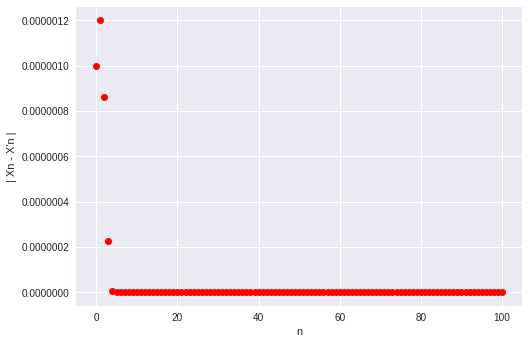

In [15]:
y = simulation(logistic_map, 0.2, 0.200001, args=(2,))

For r = 2, what is the difference between the 500th iterates, i.e., what is $|x_{500} - \hat x_{500}|$?

In [8]:
y = simulation(logistic_map, 0.2, 0.200001, n=500, plot=False, args=(2,))
print(y[499])

5.551115123125783e-17


##### Simulation for r=3.4

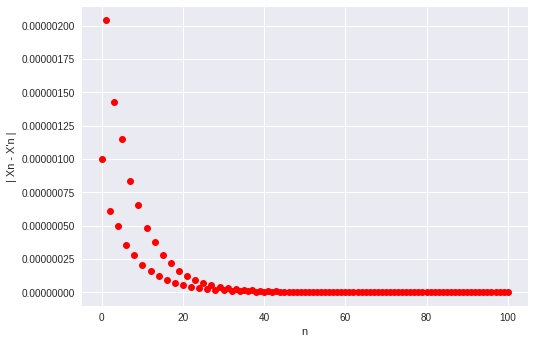

In [16]:
y = simulation(logistic_map, 0.2, 0.200001, args=(3.4,))

For r = 3.4, what is the difference between the 500th iterates, i.e., what is $|x_{500} - \hat x_{500}|$?

In [10]:
y = simulation(logistic_map, 0.2, 0.200001, n=500, plot=False, args=(3.4,))
print(y[499])

0.0


##### Simulation for r=3.72

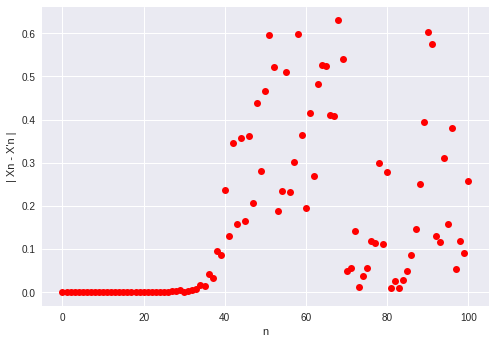

In [17]:
y = simulation(logistic_map, 0.2, 0.200001, args=(3.72,))

For r = 3.72, what is the average absolute difference for the first 5,000 iterates?

In [19]:
y = simulation(logistic_map, 0.2, 0.200001, n=5000, plot=False, args=(3.72,))
print(np.mean(y))

0.2436076489890074


For r = 3.72, what is the average absolute difference for the first 500,000 iterates?

In [20]:
y = simulation(logistic_map, 0.2, 0.200001, n=500000, plot=False, args=(3.72,))
print(np.mean(y))

0.2440668496058363
